In [88]:
# Changing & loading the df_person column names
df_person = pd.read_csv("PersonSitting_10Ksamples.csv")

df_person.columns

Index(['person', '152', '134', '178', '196', '153', '166', '209', '195', '155',
       '204', '227', '186', '172', '246', '235', '179', '206', '274', '221',
       '191', '263', '295', '196.1', '216', '310', '301', '207', '309', '374',
       '315', '205', '362', '384', '319', '309.1', '510', '424', '293',
       '319.1', '551', '429', '355', '515', '748', '612', '346', '460', '798',
       '639', '543', '712', '789', '740', '600', '856', '1000', '774', '637',
       '700', '582', '575', '599', '687', '512', '484', '502', '646', '477',
       '465', '500', '574', '422', '418', '464', '460.1', '357', '384.1',
       '426', '367', '308', '349', '371', '289', '280', '319.2'],
      dtype='object')

In [89]:
# Specify the column names for df_person
column_names_person = ['Labels'] + [str(i) for i in range(df_person.shape[1] - 1)]
df_person.columns = column_names_person
df_person.columns

Index(['Labels', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83',
       '84'],
      dtype='object')

In [107]:
non_person_count = df_person['Labels'].value_counts()['non_person']
print(non_person_count)


11


In [92]:
df_person.head(3)

,Labels,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,person,154,125,169,188,143,156,189,196,143,...,325,386,407,364,286,347,353,278,266,313
1,person,163,118,167,187,148,156,187,201,139,...,304,376,385,353,265,336,331,270,256,307
2,person,140,134,196,173,125,186,192,170,134,...,326,336,411,373,283,311,370,294,250,298


In [93]:
df_person.shape

(9999, 86)

### Changing & loading df_empty column names

In [94]:
df_empty = pd.read_csv("EmptyChair_10Ksamples.csv")


df_empty.columns

Index(['non_person', '97', '0', '94', '1', '82', '12', '79', '31', '80', '32',
       '64', '42', '54', '57', '46', '68', '33', '74', '37', '103', '58',
       '123', '60', '130', '81', '159', '95', '168', '100', '190', '151',
       '230', '115', '169', '218', '339', '354', '493', '283', '313', '208',
       '648', '748', '1000', '660', '442', '396', '624', '780', '664', '576',
       '329', '483', '77', '35', '772', '834', '995', '434', '178', '359',
       '404', '423', '305', '278', '144', '144.1', '213', '202', '153', '119',
       '149', '171', '143', '124', '88', '92', '122', '106', '103.1', '82.1',
       '75', '67', '94.1', '90'],
      dtype='object')

In [100]:
person_counts = df_empty.apply(lambda x: x.value_counts().get('person', 0))
print(person_counts)


Labels    7
0         0
1         0
2         0
3         0
         ..
80        0
81        0
82        0
83        0
84        0
Length: 86, dtype: int64


In [96]:
# Specify the column names for df_person
column_names_empty = ['Labels'] + [str(i) for i in range(df_empty.shape[1] - 1)]
df_empty.columns = column_names_empty
df_empty.columns

Index(['Labels', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83',
       '84'],
      dtype='object')

In [97]:
df_empty.head(3)

,Labels,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,non_person,13,97,6,92,4,84,12,79,32,...,56,118,91,112,66,77,65,89,91,98
1,non_person,85,20,86,18,79,6,78,19,80,...,107,61,136,79,114,59,87,65,96,85
2,non_person,59,73,61,67,60,52,69,43,74,...,106,58,136,78,117,55,84,60,95,86


In [98]:
df_empty.shape

(9999, 86)

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 3: Prepare the training data
X_train = pd.concat([df_person.iloc[:, 1:], df_empty.iloc[:, 1:]], ignore_index=True)
y_train = pd.concat([df_person['Labels'], df_empty['Labels']], ignore_index=True)


X_train.shape


(19998, 85)

## Saving the concatenated file

In [114]:
concatenated_data = pd.concat([df_person.iloc[:, 1:], df_empty.iloc[:, 1:]], ignore_index=True)
concatenated_data['Labels'] = pd.concat([df_person['Labels'], df_empty['Labels']], ignore_index=True)

#concatenated_data.to_csv('concatenated_data.csv', index=False)
concatenated_data.shape

(19998, 86)

In [115]:
counts = concatenated_data['Labels'].value_counts()
print(counts)


non_person    10003
person         9995
Name: Labels, dtype: int64


In [111]:
## Now Training the SVM model

Accuracy: 0.9887488748874887
Precision: 0.9792034530115754
Recall: 0.9986993496748374
F1 Score: 0.988855317251969


C:\Users\yousuf\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


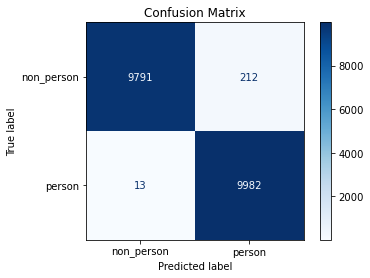

In [109]:
# Step 4: Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Step 5: Make label predictions
y_pred = svm_model.predict(X_train)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, pos_label='person')
recall = recall_score(y_train, y_pred, pos_label='person')
f1 = f1_score(y_train, y_pred, pos_label='person')

confusion_mat = confusion_matrix(y_train, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 6: Plot the confusion matrix
cm = confusion_matrix(y_train, y_pred)
disp = plot_confusion_matrix(svm_model, X_train, y_train, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()



In [117]:
df_person.head(3)

,Labels,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,person,154,125,169,188,143,156,189,196,143,...,325,386,407,364,286,347,353,278,266,313
1,person,163,118,167,187,148,156,187,201,139,...,304,376,385,353,265,336,331,270,256,307
2,person,140,134,196,173,125,186,192,170,134,...,326,336,411,373,283,311,370,294,250,298


C:\Users\yousuf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Person Dataset:
Accuracy: 0.9521952195219522
Precision: 0.998845992446496
Recall: 0.9532438926712055
F1 Score: 0.9755122950819672

Empty Dataset:
Accuracy: 0.965096509650965
Precision: 0.9994820263130633
Recall: 0.9655724579663731
F1 Score: 0.982234665309239



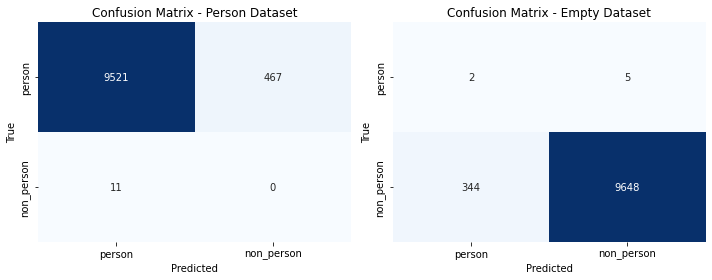

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


X_train = pd.concat([df_person.iloc[:, 1:], df_empty.iloc[:, 1:]], ignore_index=True)
y_train = pd.concat([df_person['Labels'], df_empty['Labels']], ignore_index=True)

# Step 2: Create and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Step 3: Prepare the test data
X_person_test = df_person.iloc[:, 1:]  # Features for person dataset
X_empty_test = df_empty.iloc[:, 1:]    # Features for empty dataset

# Step 4: Make predictions
y_person_pred = lr_model.predict(X_person_test)
y_empty_pred = lr_model.predict(X_empty_test)

# Step 5: Evaluate the model
person_accuracy = accuracy_score(df_person['Labels'], y_person_pred)
person_precision = precision_score(df_person['Labels'], y_person_pred, pos_label='person')
person_recall = recall_score(df_person['Labels'], y_person_pred, pos_label='person')
person_f1 = f1_score(df_person['Labels'], y_person_pred, pos_label='person')

empty_accuracy = accuracy_score(df_empty['Labels'], y_empty_pred)
empty_precision = precision_score(df_empty['Labels'], y_empty_pred, pos_label='non_person')
empty_recall = recall_score(df_empty['Labels'], y_empty_pred, pos_label='non_person')
empty_f1 = f1_score(df_empty['Labels'], y_empty_pred, pos_label='non_person')

# Step 6: Print the evaluation metrics
print("Person Dataset:")
print("Accuracy:", person_accuracy)
print("Precision:", person_precision)
print("Recall:", person_recall)
print("F1 Score:", person_f1)
print()

print("Empty Dataset:")
print("Accuracy:", empty_accuracy)
print("Precision:", empty_precision)
print("Recall:", empty_recall)
print("F1 Score:", empty_f1)
print()

# Step 7: Create the confusion matrix
cm_person = confusion_matrix(df_person['Labels'], y_person_pred, labels=['person', 'non_person'])
cm_empty = confusion_matrix(df_empty['Labels'], y_empty_pred, labels=['person', 'non_person'])

# Step 8: Plot the confusion matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_person, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['person', 'non_person'], yticklabels=['person', 'non_person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Person Dataset')

plt.subplot(1, 2, 2)
sns.heatmap(cm_empty, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['person', 'non_person'], yticklabels=['person', 'non_person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Empty Dataset')

plt.tight_layout()
plt.show()


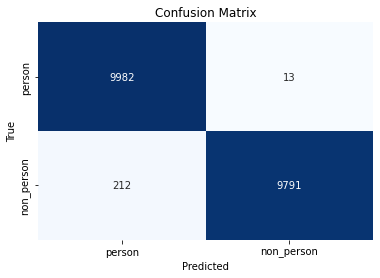

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 7: Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred, labels=['person', 'non_person'])

# Step 8: Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['person', 'non_person'], yticklabels=['person', 'non_person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
